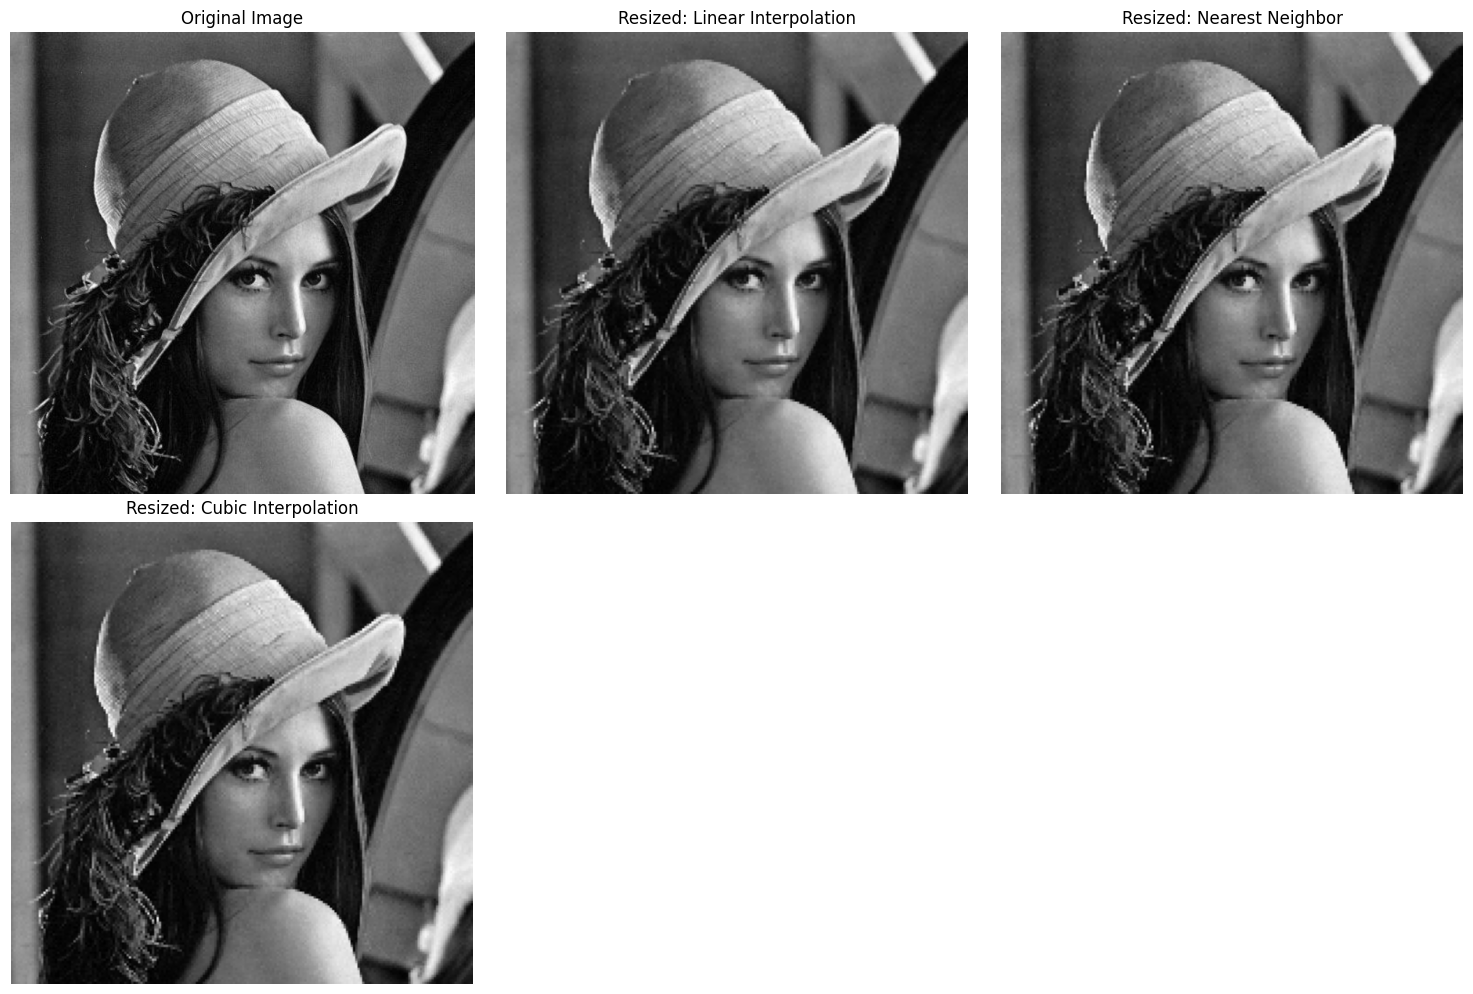

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "/content/Screenshot 2025-01-21 111933.png"
image = cv2.imread(image_path)

# Function to display a subset of images
def display_images(images, titles):
    num_images = len(images)
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)  # Adjusts to display a maximum of 6 images per page
        if len(img.shape) == 3:  # Color image
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:  # Grayscale image
            plt.imshow(img, cmap="gray")
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# 1.1 Image Resizing (Interpolation Methods)
# 1.1.1 Linear Interpolation
resized_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)

# 1.1.2 Nearest Neighbors
resized_nearest = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)

# 1.1.3 Polynomial (Cubic) Interpolation
resized_cubic = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)

# Display original and resized images
images = [image, resized_linear, resized_nearest, resized_cubic]
titles = [
    "Original Image",
    "Resized: Linear Interpolation",
    "Resized: Nearest Neighbor",
    "Resized: Cubic Interpolation",
]
display_images(images, titles)


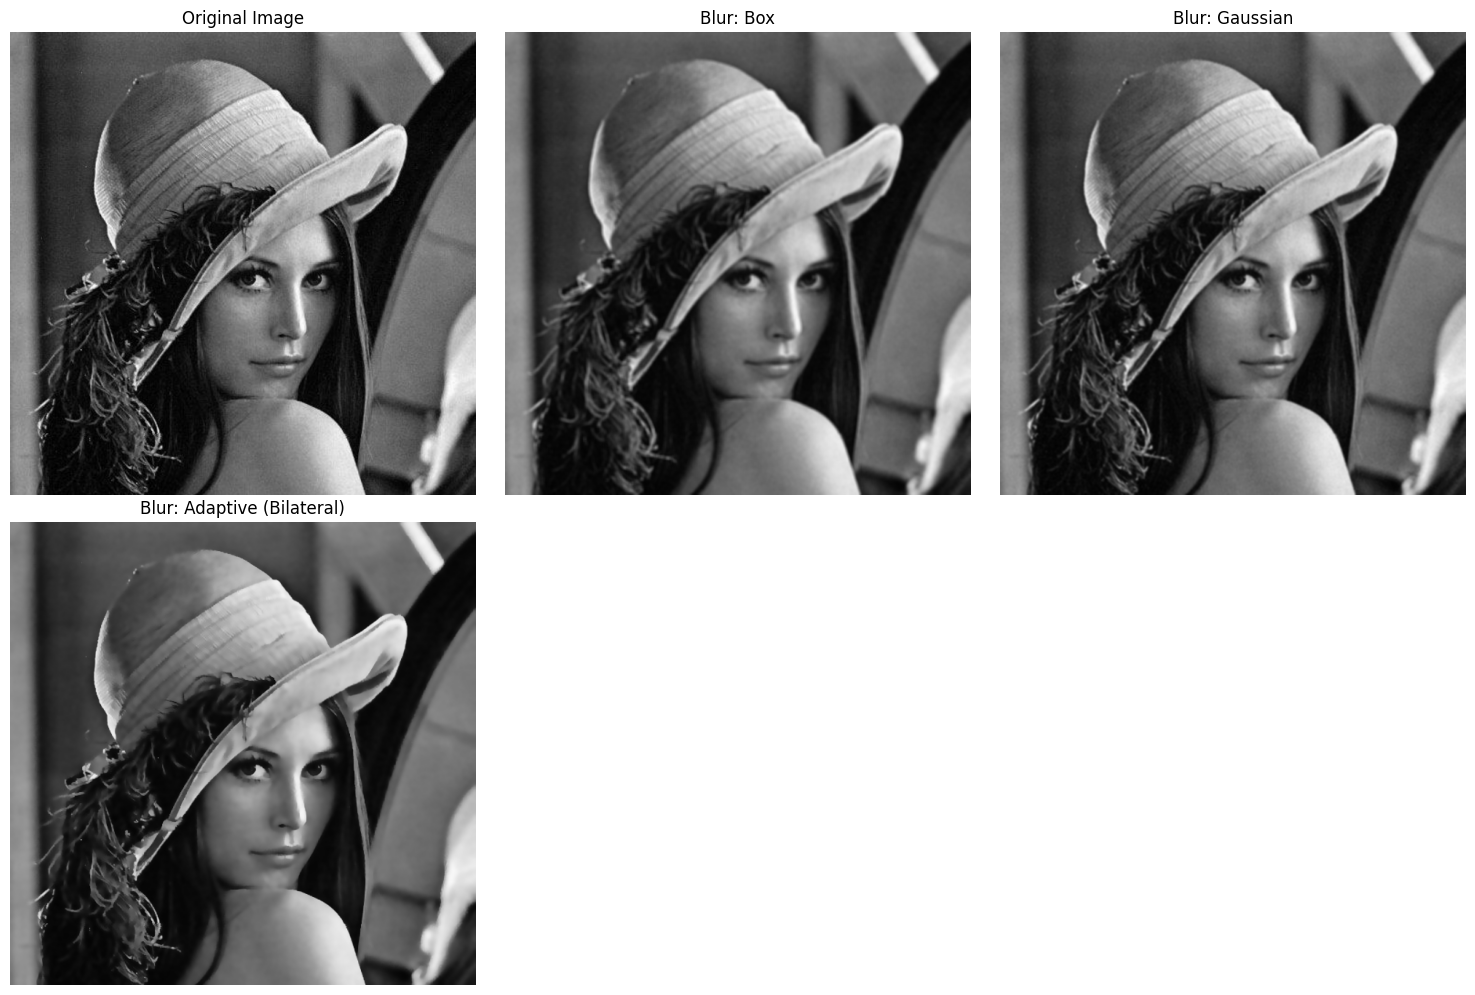

In [ ]:
# 1.2 Image Blurring
# 1.2.1 Box Blurring
blur_box = cv2.blur(image, (5, 5))

# 1.2.2 Gaussian Blurring
blur_gaussian = cv2.GaussianBlur(image, (5, 5), 0)

# 1.2.3 Adaptive Blurring (Using Bilateral Filter)
blur_adaptive = cv2.bilateralFilter(image, 9, 75, 75)

# Display blurring techniques
images = [image, blur_box, blur_gaussian, blur_adaptive]
titles = [
    "Original Image",
    "Blur: Box",
    "Blur: Gaussian",
    "Blur: Adaptive (Bilateral)",
]
display_images(images, titles)


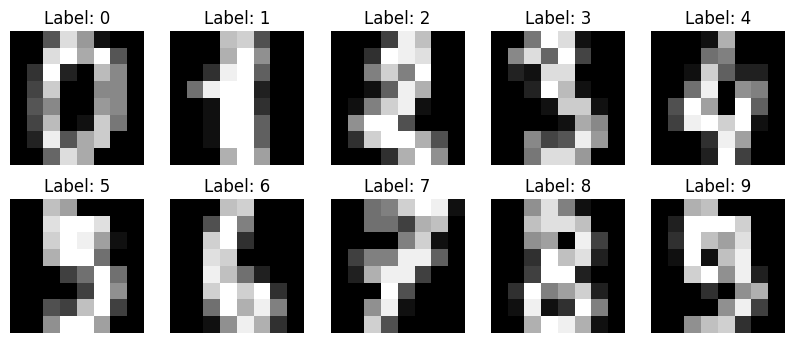

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = load_digits()
X, y = data.data, data.target

# Visualize sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(data.images[i], cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Metrics:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Metrics:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.88        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



In [ ]:
from sklearn.neural_network import MLPClassifier

# Train ANN
ann_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
ann_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_ann = ann_model.predict(X_test)
print("ANN Metrics:")
print(classification_report(y_test, y_pred_ann))


ANN Metrics:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.97      1.00      0.98        28
           2       0.94      1.00      0.97        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.95      1.00      0.98        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



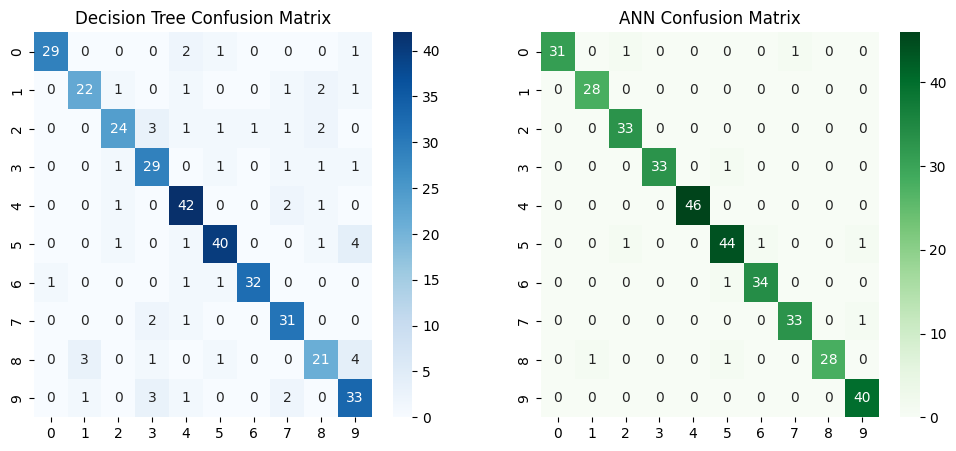

In [ ]:
import seaborn as sns

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("ANN Confusion Matrix")
plt.show()


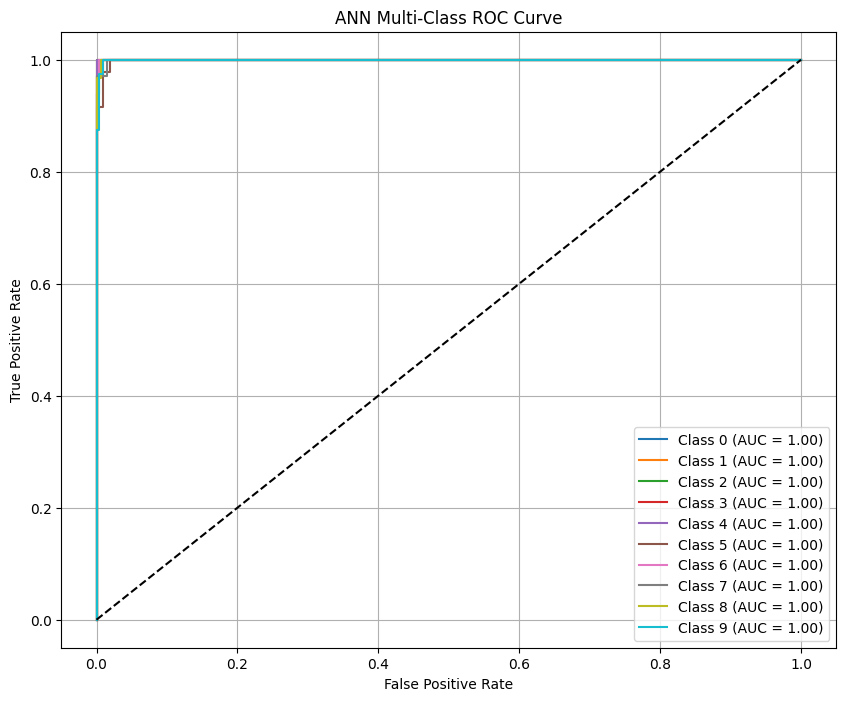

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y))
dt_proba = dt_model.predict_proba(X_test)
ann_proba = ann_model.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], ann_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC for ANN
plt.figure(figsize=(10, 8))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ANN Multi-Class ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()
